In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

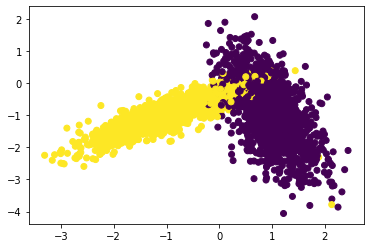

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
#colors = {0:'orange', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom GridSearchCV

In [9]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score
def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train):
    print(random.sample(range(0, len(x_train)), int(0.6*len(x_train))))
    return random.sample(range(0, len(x_train)), int(0.6*len(x_train)))

def GridSearch(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            # check this out: https://stackoverflow.com/a/9755548/4084039
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
            test_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices))

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
        print(x_train)
    return trainscores,testscores

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
folds = 3

trainscores,testscores = GridSearch(X_train, y_train, neigh, params, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

[5039, 7348, 1266, 2392, 4880, 3228, 2594, 894, 2467, 5413, 6023, 4230, 214, 6754, 6278, 857, 3614, 7478, 1492, 2412, 2286, 3603, 927, 6341, 6968, 832, 1557, 6122, 6860, 1523, 5061, 271, 6033, 6485, 1505, 4712, 1625, 6469, 5425, 5067, 6108, 6225, 1292, 1467, 431, 4933, 2850, 7141, 1474, 672, 2581, 264, 7018, 3362, 4307, 3951, 1520, 4590, 5835, 4729, 4347, 3968, 2846, 3684, 5486, 1472, 6075, 533, 4181, 5857, 5564, 4644, 6060, 2699, 3670, 5396, 4229, 1063, 3397, 1714, 4799, 3404, 843, 2550, 4322, 1842, 530, 5017, 5628, 4530, 5509, 1571, 6597, 3048, 1489, 2842, 5868, 1397, 4740, 2907, 6870, 5343, 4253, 1769, 5098, 6911, 5262, 4772, 2072, 3380, 3247, 3506, 1703, 2935, 3113, 65, 2697, 5234, 5871, 1633, 7292, 619, 936, 4919, 4518, 1632, 643, 4427, 7068, 2338, 277, 4538, 5199, 1022, 1817, 3591, 1590, 262, 2570, 2976, 4907, 3469, 3299, 276, 6305, 5774, 4709, 1020, 1951, 203, 6879, 5804, 6010, 4002, 4528, 892, 346, 2253, 2313, 4324, 4913, 6356, 3077, 1281, 482, 5477, 7247, 4412, 5038, 3865, 230

[3466, 5751, 3939, 6642, 7460, 1432, 5188, 2397, 900, 7369, 2226, 4045, 802, 2326, 5328, 2644, 2526, 3752, 197, 313, 3521, 3477, 1015, 292, 3983, 6864, 3691, 4993, 5968, 738, 1889, 5532, 997, 2336, 5806, 5773, 6738, 3527, 1262, 3626, 3789, 2084, 3665, 719, 4264, 4987, 2075, 1129, 4167, 765, 4828, 2116, 376, 3912, 2622, 1503, 2419, 6550, 5796, 1556, 4013, 1293, 4426, 1238, 1976, 426, 7286, 3761, 5979, 6316, 4731, 2354, 4366, 5173, 7459, 3546, 6972, 4008, 448, 4754, 307, 526, 2324, 4748, 4457, 6270, 1483, 4338, 6806, 1993, 695, 6742, 3239, 1081, 2215, 160, 2343, 2344, 2271, 2384, 6357, 1813, 3122, 6292, 2613, 484, 726, 5695, 2383, 1035, 4560, 7053, 2688, 2469, 681, 1781, 935, 2088, 7197, 95, 5267, 3636, 5974, 357, 4122, 3857, 439, 251, 2619, 2922, 1024, 165, 5527, 7060, 134, 4462, 1005, 5831, 1336, 4882, 3212, 1668, 4262, 1677, 2298, 4702, 1274, 3371, 2427, 2949, 907, 5884, 4679, 2184, 949, 6347, 548, 6522, 4269, 4730, 5586, 4836, 5469, 1654, 3169, 4925, 7087, 6996, 7252, 6775, 6658, 162

[1267, 1608, 4946, 5551, 5375, 5450, 3959, 4566, 5592, 5744, 2908, 4247, 358, 1542, 1810, 3786, 7026, 4667, 3593, 2099, 1137, 3474, 90, 116, 5678, 3043, 1380, 4174, 5315, 6135, 487, 3884, 2990, 6529, 3058, 5211, 4012, 400, 6591, 1358, 1654, 1760, 6552, 6541, 5737, 3265, 3788, 112, 311, 767, 607, 33, 4110, 5113, 518, 2753, 1359, 6852, 3992, 3772, 6654, 5919, 1726, 1361, 5475, 6738, 3158, 7179, 4076, 5144, 5220, 534, 4579, 3518, 3645, 3496, 2193, 5478, 3341, 3660, 1904, 6790, 444, 6769, 4194, 1248, 2135, 2688, 6819, 4590, 7089, 1796, 914, 1562, 6690, 720, 5602, 4972, 441, 5894, 600, 1512, 6162, 3831, 6049, 7448, 551, 1651, 4576, 7233, 4009, 4876, 505, 1997, 6778, 5697, 2101, 968, 2012, 3979, 6402, 1756, 6699, 2961, 45, 3713, 4736, 5221, 630, 5030, 2062, 5962, 6563, 3200, 7310, 143, 2724, 781, 986, 3955, 7341, 3001, 5305, 5486, 4534, 7340, 5247, 7019, 1815, 2894, 1195, 3803, 2331, 703, 357, 7022, 955, 4857, 6078, 6346, 899, 2004, 6968, 6442, 517, 2539, 6896, 7477, 18, 2768, 6943, 3473, 70


[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


  9%|███████▌                                                                           | 1/11 [00:01<00:11,  1.15s/it]

[3849, 59, 1470, 6601, 5150, 161, 2365, 5817, 4930, 6474, 6214, 5745, 2317, 5129, 1379, 7237, 4877, 6092, 6890, 49, 532, 336, 2021, 6755, 2690, 5332, 5153, 4185, 3147, 1945, 4871, 3541, 4818, 7143, 3407, 4231, 1094, 7195, 1753, 3300, 1827, 1436, 5599, 4063, 119, 3609, 3368, 3014, 5403, 7140, 5159, 3960, 5964, 5261, 3989, 2267, 7014, 3648, 176, 3770, 4737, 4957, 5996, 1954, 4555, 3409, 177, 4327, 6243, 7088, 2702, 4687, 4885, 6845, 2065, 3021, 5265, 4559, 6445, 3269, 4587, 1664, 5017, 4711, 7217, 491, 5785, 962, 1801, 3474, 2571, 1739, 6151, 6153, 2973, 4220, 4096, 5072, 2438, 4753, 4190, 2638, 3841, 6182, 5343, 7294, 4894, 1322, 6491, 7101, 1530, 6567, 2007, 3631, 4484, 1735, 6960, 2439, 263, 407, 4712, 4850, 6664, 4870, 1671, 7154, 4089, 1102, 2499, 5681, 5271, 2263, 2128, 5682, 1180, 590, 110, 6885, 1442, 153, 2738, 3709, 7352, 3902, 1807, 3808, 3514, 6592, 332, 1173, 1100, 1938, 3828, 6335, 343, 3013, 381, 4908, 1537, 223, 4150, 2544, 2998, 1346, 6147, 486, 2871, 3346, 6787, 5475, 6

[6660, 7189, 6, 5452, 6440, 4822, 6838, 6352, 6090, 2061, 1103, 6112, 6056, 4070, 1789, 7131, 2816, 7050, 6820, 3203, 6662, 2487, 5579, 5778, 6724, 4731, 125, 3758, 6408, 655, 6373, 6628, 2803, 4867, 4552, 4700, 738, 3725, 7047, 2296, 3701, 1800, 4911, 866, 429, 6968, 4971, 4750, 1193, 7129, 5182, 56, 6216, 6174, 1653, 335, 4077, 792, 1326, 6531, 5397, 1472, 59, 6422, 367, 2957, 3311, 1438, 1069, 3571, 2095, 5935, 2063, 2590, 4782, 1147, 2521, 1636, 4707, 5572, 6909, 7071, 1319, 3066, 3515, 4373, 1821, 2461, 6342, 4752, 6679, 2173, 1930, 5429, 935, 3106, 174, 6092, 2527, 6452, 6974, 1841, 2235, 1423, 762, 164, 6743, 6545, 5221, 1568, 6433, 912, 1114, 2042, 1635, 512, 6512, 5753, 5410, 5354, 4276, 2634, 6199, 4012, 3286, 810, 3304, 4136, 5498, 2069, 4010, 5743, 7378, 2669, 4582, 7121, 1744, 3067, 5426, 7321, 3543, 2788, 1597, 7018, 6464, 5113, 6108, 1203, 756, 4484, 7279, 1231, 3919, 1667, 3294, 6782, 4793, 3900, 6312, 1586, 4635, 4139, 3285, 1045, 4187, 3777, 6529, 7477, 294, 7435, 108

[6814, 6759, 4470, 5578, 2797, 4067, 1777, 2399, 33, 740, 1346, 6874, 4820, 4811, 6435, 3358, 1673, 4921, 1309, 1403, 578, 3521, 7352, 2131, 6780, 931, 6523, 1487, 5849, 2608, 6309, 3488, 4984, 1490, 4372, 1572, 312, 6147, 5514, 3855, 5742, 6453, 956, 2469, 1954, 274, 2088, 6563, 2259, 577, 122, 2493, 5255, 1061, 3252, 4651, 6746, 2976, 1330, 7410, 3078, 5854, 1517, 5535, 753, 1669, 4018, 5702, 2614, 3841, 2314, 4981, 1851, 1221, 31, 4408, 7390, 6933, 318, 6756, 4859, 5031, 1396, 218, 1724, 403, 6581, 4782, 2740, 2539, 6765, 40, 916, 7499, 4883, 2836, 2961, 1433, 5740, 7102, 3027, 996, 3151, 1551, 220, 1170, 1129, 7483, 6194, 7240, 46, 5785, 6423, 969, 251, 3691, 7098, 4567, 746, 400, 7378, 156, 4918, 3322, 3043, 5910, 1136, 4277, 3243, 2995, 4204, 546, 602, 19, 6244, 6006, 6568, 1333, 7139, 5745, 2425, 5728, 3192, 975, 1368, 1938, 4400, 6690, 2057, 5207, 1788, 4815, 6800, 5945, 3752, 5586, 102, 6430, 2964, 307, 4333, 6339, 2529, 897, 129, 1828, 2446, 1476, 4445, 3812, 804, 436, 6113, 


[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


 18%|███████████████                                                                    | 2/11 [00:02<00:10,  1.17s/it]

[6367, 5747, 214, 794, 3579, 6539, 443, 6672, 3007, 3683, 4698, 6892, 4154, 6704, 1443, 6170, 6930, 1794, 2711, 191, 2792, 1188, 3348, 3797, 1404, 1839, 2976, 2125, 4997, 3662, 5596, 1647, 5412, 4623, 685, 2983, 5818, 3451, 3337, 245, 609, 1456, 5935, 4559, 2672, 6658, 4877, 4215, 4620, 7385, 4289, 6749, 6253, 2343, 2904, 5170, 5652, 7143, 3108, 1309, 5590, 2067, 6523, 344, 2246, 4114, 1300, 1816, 882, 4909, 695, 7382, 6765, 4322, 7232, 2814, 2010, 1095, 24, 4441, 6669, 4015, 6485, 4081, 1559, 1197, 1679, 1150, 6181, 4339, 5682, 2413, 6210, 4668, 840, 2671, 7499, 1662, 3277, 5569, 5837, 7460, 5314, 5352, 2407, 4773, 2680, 7015, 3747, 6910, 1287, 6832, 610, 6994, 4146, 2463, 2176, 6967, 1522, 6100, 6274, 1544, 2917, 1619, 1482, 6144, 2945, 4901, 1270, 2419, 6275, 2368, 881, 3436, 5187, 827, 4654, 4334, 6983, 1499, 3351, 2955, 7463, 2557, 859, 5583, 5943, 7487, 807, 982, 7424, 4367, 1694, 2229, 3992, 1458, 6269, 7422, 777, 7237, 5401, 3875, 2923, 7221, 7299, 4921, 7163, 1538, 2591, 1219,

[5578, 3561, 2698, 6483, 7361, 225, 5557, 3006, 6810, 998, 2840, 2885, 4959, 477, 7145, 4563, 6926, 6918, 3566, 3841, 1119, 2212, 296, 2945, 5301, 2476, 2982, 1014, 1777, 5985, 2619, 5631, 1627, 3107, 3839, 1944, 6481, 6812, 5202, 1069, 1948, 3239, 759, 5066, 6625, 6718, 2399, 4116, 3216, 4524, 4758, 1748, 5539, 1523, 4153, 6107, 5945, 5191, 4454, 1877, 4047, 2514, 1734, 7469, 2286, 1428, 2794, 747, 6953, 173, 7271, 3497, 356, 7446, 419, 7287, 4700, 3450, 3230, 3760, 1347, 4682, 5778, 4126, 3113, 5547, 2900, 5429, 3622, 4359, 5869, 5111, 4916, 7262, 3158, 4193, 6524, 4469, 73, 2185, 2196, 359, 7049, 6042, 2169, 6529, 3541, 4533, 7278, 6952, 2229, 3414, 6410, 3337, 967, 6327, 917, 6111, 6138, 3283, 5854, 4218, 3311, 5681, 7040, 1075, 6249, 1253, 832, 4361, 3543, 7109, 5771, 6951, 3445, 2145, 4754, 4132, 3399, 3602, 6841, 6987, 1521, 5566, 7175, 5002, 1305, 1232, 6706, 644, 895, 5461, 2150, 6957, 4829, 5811, 3505, 4383, 461, 4974, 4059, 4739, 1067, 3325, 1351, 3576, 6153, 7001, 1194, 292

[4219, 2768, 5003, 2283, 1187, 1467, 4985, 178, 3372, 7171, 6625, 7344, 6526, 3417, 1703, 4856, 7341, 3646, 1212, 144, 5268, 4351, 6131, 2577, 1923, 2087, 4306, 3126, 6719, 4528, 116, 3054, 3866, 3514, 380, 3407, 6329, 1614, 2222, 6540, 5029, 7017, 909, 6281, 6339, 4092, 1202, 2594, 2349, 2906, 5679, 886, 1197, 4797, 2094, 4774, 4033, 1410, 3410, 1896, 5092, 2908, 7057, 2726, 4946, 7069, 4164, 5982, 751, 51, 6937, 6911, 4401, 3781, 3707, 3877, 6984, 4861, 3970, 7034, 6562, 3339, 7029, 1654, 914, 6824, 1003, 7458, 6593, 4146, 726, 3720, 7456, 4677, 2129, 1157, 4405, 4798, 2395, 238, 1767, 5385, 5152, 5306, 5549, 4343, 4477, 2088, 7156, 803, 3205, 1351, 5115, 1620, 4232, 4302, 5414, 3077, 2371, 4429, 3041, 4217, 4679, 1621, 3670, 2869, 3200, 6079, 6621, 3010, 1245, 1890, 2033, 1266, 6276, 2592, 4752, 5151, 2407, 5845, 3218, 2199, 1380, 3235, 1593, 3829, 4737, 4293, 7210, 59, 4165, 472, 846, 341, 2224, 7471, 2675, 5898, 1988, 703, 7183, 3545, 2999, 682, 1373, 910, 4307, 757, 7127, 7109, 5


[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


 27%|██████████████████████▋                                                            | 3/11 [00:03<00:09,  1.20s/it]

[4202, 7368, 5402, 1316, 5203, 5688, 3722, 5418, 957, 1766, 3091, 6622, 1485, 2757, 5468, 3284, 330, 5960, 5779, 5336, 484, 2827, 4492, 1289, 2151, 2234, 1568, 6094, 816, 365, 2797, 4120, 2111, 5433, 734, 7163, 2259, 1796, 2594, 636, 5422, 6734, 4126, 3168, 1095, 4514, 5635, 2749, 4482, 5691, 1222, 4745, 4806, 78, 3092, 2099, 2120, 1001, 5113, 2587, 537, 194, 6961, 4239, 282, 6576, 4607, 399, 1339, 2733, 2154, 3708, 2840, 3695, 2266, 2178, 5724, 2746, 3803, 773, 3372, 2562, 4914, 1138, 2191, 1030, 2355, 4490, 532, 2890, 6089, 6556, 6024, 6826, 3560, 3970, 5629, 1401, 418, 2599, 5333, 3624, 3458, 4258, 3565, 5706, 5248, 1394, 3619, 3715, 2128, 3327, 279, 2186, 5452, 7173, 866, 2920, 3360, 1367, 3500, 2064, 4825, 6279, 3651, 2037, 4654, 3603, 1100, 628, 971, 6295, 5472, 2732, 5399, 3223, 6594, 4065, 1203, 4759, 768, 1662, 3088, 5616, 2311, 5451, 2978, 245, 6199, 3229, 1797, 7350, 6981, 4533, 5837, 2895, 2868, 3177, 1656, 5161, 5408, 3646, 2135, 4084, 6727, 126, 3772, 3601, 5567, 7099, 15

[4214, 7407, 5253, 4133, 7225, 5243, 2883, 2865, 5863, 3260, 6319, 2177, 2342, 3294, 2765, 3700, 1218, 5176, 4447, 2785, 6855, 5905, 5138, 3286, 3716, 6109, 4757, 7493, 3021, 5584, 3112, 5185, 1313, 6791, 4869, 1028, 3685, 5803, 2181, 7276, 4003, 7419, 4139, 5962, 3344, 6521, 4393, 7155, 1210, 4243, 593, 3004, 857, 4257, 5852, 2917, 6368, 533, 4683, 4290, 453, 3206, 2486, 4874, 5122, 1757, 1802, 3127, 6972, 1558, 238, 277, 6536, 2117, 5653, 6552, 7277, 7490, 5084, 6309, 4467, 4372, 1936, 1185, 5892, 1190, 5805, 5125, 527, 5766, 996, 1085, 2430, 1253, 1650, 4679, 1138, 2669, 3620, 5737, 122, 2711, 7437, 3890, 6632, 324, 5947, 3051, 3856, 3123, 5554, 986, 4123, 5503, 578, 1205, 4075, 6446, 6326, 1780, 2805, 4708, 5437, 6132, 3825, 7097, 6189, 3011, 7038, 648, 6983, 5924, 1080, 4651, 6656, 4341, 4168, 2701, 5032, 7178, 2857, 4131, 5141, 3899, 2330, 7160, 4867, 6042, 2869, 1928, 5060, 668, 2573, 6561, 189, 6660, 4644, 4031, 7216, 3272, 7336, 5337, 124, 3062, 3070, 5359, 4377, 6267, 3911, 4

[4951, 3794, 3007, 4751, 1762, 6724, 3227, 3515, 5387, 1316, 4692, 1307, 6337, 4971, 4582, 212, 7422, 5767, 2386, 2188, 3799, 7209, 771, 7269, 5710, 713, 3635, 5101, 5432, 6175, 3775, 3315, 540, 450, 2724, 1855, 2252, 7054, 1942, 5337, 7417, 3115, 5987, 5382, 5065, 1359, 417, 2726, 7162, 3780, 1644, 471, 4987, 7230, 1950, 5966, 7092, 2481, 4145, 2596, 4278, 4863, 3552, 3898, 199, 2661, 1626, 5860, 3135, 6399, 3313, 5177, 50, 3798, 4889, 842, 853, 6126, 928, 5709, 5507, 6272, 2810, 7053, 5525, 5529, 1161, 3202, 343, 1591, 4062, 2720, 6486, 3120, 87, 6019, 5135, 359, 4607, 3461, 5883, 464, 3908, 4902, 3851, 608, 6978, 582, 2221, 6039, 7021, 3944, 3524, 3327, 4604, 3513, 3792, 3569, 3216, 1175, 3940, 3386, 840, 1708, 3223, 6195, 4851, 954, 105, 5968, 7333, 6172, 6811, 1137, 5981, 6324, 6987, 6967, 828, 2961, 2536, 551, 1854, 3554, 5087, 4800, 3628, 7489, 4575, 1902, 1036, 1944, 3546, 88, 2777, 3158, 1764, 769, 1741, 5435, 4860, 154, 7455, 2424, 2747, 5884, 4336, 1704, 3409, 6828, 5023, 22


[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


 36%|██████████████████████████████▏                                                    | 4/11 [00:04<00:08,  1.20s/it]

[2905, 6752, 4324, 1674, 5680, 5109, 7230, 3024, 2236, 1468, 3577, 5467, 3694, 2796, 5933, 1838, 4344, 6803, 2645, 4186, 6594, 3326, 1421, 259, 619, 3927, 1899, 445, 93, 6342, 4119, 6721, 820, 4278, 2355, 4408, 5000, 1704, 6326, 3323, 620, 5247, 5108, 4233, 5475, 2280, 6831, 4727, 1121, 5710, 1239, 3855, 1398, 4867, 378, 2489, 3018, 1807, 1932, 5592, 5089, 6524, 6210, 2417, 3080, 6633, 6522, 5813, 6668, 2091, 5741, 1548, 4442, 4483, 1295, 623, 1542, 2122, 5415, 2863, 772, 2043, 880, 6429, 6455, 394, 1820, 7231, 5883, 3633, 4763, 898, 6130, 6306, 409, 6901, 2572, 2183, 7499, 5206, 4584, 4415, 4753, 3245, 2851, 3525, 1330, 7398, 138, 5154, 2666, 727, 2903, 3663, 2761, 269, 5648, 190, 499, 3964, 6417, 3258, 2953, 4488, 1936, 5879, 1003, 3149, 5562, 6024, 5974, 1128, 2343, 4334, 7214, 5868, 3561, 1561, 4425, 7124, 3892, 4350, 2525, 1707, 7340, 2656, 5694, 6971, 3738, 4539, 787, 7335, 3791, 4888, 4039, 5696, 5213, 1626, 1713, 5796, 522, 3285, 4418, 137, 368, 2021, 2746, 793, 2102, 6207, 318

[1161, 1241, 2116, 5119, 6502, 2430, 2733, 5423, 5417, 3541, 6368, 1791, 5171, 2056, 4970, 6364, 305, 5481, 4280, 6405, 6024, 951, 5155, 571, 4777, 6995, 2191, 2617, 795, 586, 5035, 561, 143, 2066, 5614, 3124, 4327, 5517, 1964, 6142, 1400, 1077, 3845, 2024, 4048, 1892, 1536, 3948, 6485, 6433, 1974, 5431, 2204, 437, 3563, 6026, 7304, 3789, 3002, 6070, 946, 1710, 5621, 4920, 5167, 1236, 2528, 2643, 4021, 3197, 5036, 5229, 1088, 5090, 5641, 4297, 1373, 4747, 5147, 3162, 6687, 414, 3695, 7340, 2441, 2566, 4153, 7174, 2352, 7191, 1682, 6020, 7489, 1154, 4196, 7069, 6465, 2860, 3007, 4549, 1787, 472, 3470, 3462, 2120, 7210, 3088, 833, 612, 4408, 1173, 770, 1185, 1146, 2130, 1535, 6663, 7312, 6225, 5934, 2684, 5200, 2989, 4669, 675, 5231, 5293, 4957, 1230, 818, 2680, 7437, 7326, 6409, 4332, 6403, 5808, 5479, 5559, 5597, 5744, 4370, 3794, 6541, 7232, 1329, 436, 6919, 4428, 5917, 7015, 3750, 4856, 4237, 1513, 1362, 3728, 6531, 894, 3370, 4111, 7318, 2848, 42, 3745, 6784, 6732, 1078, 1390, 6703,

[2130, 5552, 252, 4566, 7023, 3885, 590, 1415, 6005, 683, 5442, 6828, 2246, 5457, 5076, 5305, 1024, 444, 4573, 3523, 1448, 5311, 4348, 1421, 6378, 5688, 7194, 6237, 5316, 5903, 5605, 1400, 2420, 5594, 3257, 5273, 5596, 2258, 2218, 916, 7469, 2332, 4102, 1608, 5715, 247, 74, 4971, 3542, 3977, 7458, 740, 7435, 7277, 2394, 6956, 5481, 1560, 3082, 5915, 2339, 6593, 6850, 5255, 1796, 3891, 2772, 5982, 662, 6927, 288, 3598, 1424, 1917, 2116, 2176, 53, 3481, 2265, 6137, 3183, 7086, 2952, 2384, 4421, 1925, 7157, 5848, 1654, 6326, 6719, 1634, 7403, 4080, 5085, 3860, 209, 1473, 4106, 6212, 3779, 92, 358, 6980, 3557, 153, 818, 3304, 1182, 6569, 910, 5899, 3682, 5227, 1124, 6136, 3336, 1479, 4796, 2012, 2680, 1583, 1142, 1871, 6242, 366, 2454, 1755, 1211, 3036, 6571, 647, 7344, 5626, 4455, 7331, 5206, 5979, 1058, 5079, 6249, 5847, 7223, 1173, 7263, 399, 6273, 6431, 3083, 5130, 5124, 2089, 5248, 6990, 6243, 6230, 1252, 5821, 5232, 6520, 3702, 4085, 4008, 2516, 5174, 124, 4283, 2207, 2281, 5420, 335


[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


 45%|█████████████████████████████████████▋                                             | 5/11 [00:06<00:08,  1.36s/it]

[4343, 2595, 3068, 7430, 5192, 3510, 6429, 7018, 5439, 7152, 7179, 5378, 2591, 4144, 4965, 4597, 4005, 2144, 5063, 5563, 1033, 6353, 6646, 192, 6874, 7223, 7217, 2414, 1106, 6008, 1489, 5356, 6369, 3189, 2707, 4319, 5316, 5418, 1368, 1972, 5670, 5168, 4892, 3912, 3855, 5962, 1958, 1917, 3653, 5588, 6310, 2457, 2101, 816, 4829, 285, 5957, 347, 5155, 2747, 4904, 3070, 2633, 6403, 7006, 7492, 7074, 236, 2741, 583, 1431, 429, 4547, 1185, 6584, 3559, 3442, 3303, 2343, 442, 2265, 5182, 6992, 1957, 4854, 1153, 2138, 1791, 6693, 2823, 178, 4846, 2791, 5239, 1503, 4704, 374, 4733, 4460, 369, 7272, 6757, 2018, 6581, 7161, 2473, 5492, 36, 133, 264, 1726, 194, 5954, 3530, 1427, 6856, 6750, 961, 3699, 2575, 2184, 2872, 4754, 3721, 3661, 1351, 744, 644, 3744, 555, 5387, 4784, 2152, 7108, 834, 4426, 1378, 443, 3604, 3663, 1224, 844, 769, 1996, 6070, 2315, 1020, 1897, 2477, 6488, 1349, 4163, 5018, 2021, 6989, 247, 4032, 6378, 3019, 6972, 1263, 571, 3243, 4942, 4872, 6362, 386, 5207, 4186, 7013, 4139, 

[7267, 339, 4379, 1912, 802, 6430, 5793, 5289, 3130, 1236, 346, 2309, 3197, 4626, 5920, 1654, 397, 5021, 4115, 1870, 4309, 3757, 3447, 2673, 6928, 2715, 1167, 5097, 2629, 4701, 3083, 6908, 4537, 6028, 552, 3909, 2953, 5961, 2223, 2898, 521, 1485, 9, 6351, 6564, 5587, 4454, 3802, 2722, 4485, 2298, 1056, 5475, 6970, 3199, 3570, 379, 7142, 7485, 5313, 5286, 5787, 6476, 4401, 1382, 7258, 7229, 3175, 7134, 4627, 832, 1084, 7275, 1239, 27, 4408, 3915, 3099, 5347, 1961, 4721, 1250, 3198, 7328, 251, 7205, 3846, 1720, 3801, 5491, 456, 3850, 1103, 4016, 2557, 6210, 4190, 2802, 4020, 6162, 4982, 1172, 4849, 6990, 5674, 2450, 3481, 5509, 900, 7480, 1189, 2929, 2409, 6396, 1123, 4256, 7240, 441, 1094, 1112, 2868, 3687, 5548, 7317, 4715, 3988, 7249, 4862, 2596, 1348, 7070, 6189, 3632, 3208, 7183, 4428, 6008, 4786, 1301, 5896, 580, 3315, 2875, 6988, 5719, 3982, 7160, 6335, 6606, 547, 5810, 1116, 5873, 1831, 3025, 3131, 4195, 2908, 5378, 4008, 627, 1413, 1678, 7197, 1900, 3947, 3355, 118, 5302, 3357, 

[3091, 106, 6392, 2478, 5843, 1031, 5956, 4267, 6395, 5921, 1357, 7137, 7103, 2868, 3194, 6140, 5937, 5295, 3499, 7228, 5656, 6388, 2430, 521, 5052, 6152, 5665, 1928, 7019, 14, 3248, 7403, 4193, 5797, 2093, 6081, 2808, 1296, 7344, 2453, 7084, 2487, 3229, 264, 1443, 6891, 5035, 4366, 3845, 5347, 3532, 2144, 4698, 407, 1644, 917, 333, 2015, 7446, 82, 255, 308, 827, 7388, 1889, 4164, 3903, 4342, 3528, 5944, 488, 2880, 1118, 2490, 4321, 1385, 107, 5794, 6681, 2326, 6607, 1713, 5839, 1203, 2735, 6995, 2405, 1422, 232, 5324, 5511, 5438, 1856, 904, 5994, 5405, 449, 3336, 679, 6251, 3011, 938, 5260, 3360, 6185, 3100, 4849, 467, 4384, 5177, 574, 5765, 2993, 3468, 4607, 4920, 1595, 5629, 6652, 5865, 425, 7382, 4827, 7139, 1251, 3992, 1881, 1503, 4124, 2799, 3560, 4533, 2565, 4524, 2919, 1164, 4638, 2931, 4865, 4948, 2310, 543, 514, 4447, 1510, 3163, 4898, 4080, 3430, 4106, 3251, 5330, 6970, 6846, 3034, 1945, 1613, 6195, 5236, 2802, 5806, 6313, 5111, 2950, 1086, 5090, 4880, 5265, 2618, 456, 1347,


[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:07<00:06,  1.36s/it]

[3174, 5714, 4628, 4595, 3932, 6662, 3907, 5577, 4908, 1190, 4418, 855, 2601, 999, 7156, 4629, 3994, 7313, 7320, 3310, 641, 3944, 5849, 814, 832, 6244, 6896, 1776, 2460, 6441, 5110, 4040, 2115, 3934, 3750, 6592, 162, 6403, 2110, 2621, 5091, 2080, 2043, 2358, 5698, 6918, 4367, 4585, 4888, 7439, 6778, 915, 5209, 5779, 7255, 765, 6638, 3959, 6844, 2817, 2421, 3954, 4366, 4431, 5288, 4369, 2823, 722, 5802, 4611, 4516, 3132, 546, 6672, 3645, 6033, 4234, 5276, 6209, 2490, 159, 1345, 5278, 2389, 4771, 6749, 2401, 5234, 2081, 7278, 2814, 7073, 2198, 3385, 5719, 1683, 4483, 2713, 3050, 6440, 1533, 745, 3894, 4180, 4451, 2868, 4508, 2544, 2069, 2255, 4287, 1920, 109, 7305, 2409, 4388, 337, 1280, 5707, 3072, 7110, 6105, 2890, 793, 5778, 5992, 5947, 1959, 7109, 205, 1201, 1164, 1643, 6128, 2282, 1482, 6195, 4048, 3246, 3069, 4541, 3928, 6875, 4479, 1698, 249, 6337, 1045, 758, 3567, 4136, 985, 2792, 2403, 4002, 38, 4328, 3442, 5634, 1083, 2939, 6697, 1238, 1991, 221, 7312, 7057, 5669, 5837, 6548, 4

[1178, 6089, 3405, 5275, 2767, 1510, 1383, 5623, 7305, 101, 6147, 4316, 2626, 4213, 6781, 6653, 3751, 6570, 3555, 4599, 4879, 2398, 6300, 7156, 6420, 806, 284, 2007, 5048, 6749, 3095, 315, 7327, 3828, 5820, 6918, 3368, 3887, 4065, 5159, 7476, 6780, 4849, 4239, 4883, 7314, 2441, 5456, 1845, 3728, 5277, 56, 1504, 150, 6281, 1184, 153, 2941, 2578, 3352, 4150, 7196, 337, 3207, 2500, 6255, 1538, 5802, 822, 5513, 1216, 4540, 1048, 1372, 6668, 4124, 5473, 2396, 7485, 2870, 3583, 7001, 5691, 3097, 5654, 6031, 4010, 609, 1678, 334, 4701, 4106, 1553, 648, 7096, 1982, 5998, 2459, 4781, 4901, 326, 4440, 6813, 5232, 477, 2354, 340, 1406, 7406, 2895, 3881, 4766, 5883, 569, 6901, 1695, 6905, 1223, 5920, 7487, 2004, 1637, 3492, 468, 3267, 1207, 1468, 4279, 2726, 6476, 495, 2845, 5496, 7192, 458, 1545, 5185, 7289, 3187, 464, 887, 5027, 3886, 3533, 6419, 478, 6935, 3942, 2115, 1028, 1057, 5639, 5726, 3631, 1531, 7011, 2510, 288, 5889, 2987, 6017, 4039, 5539, 5425, 4498, 3022, 4236, 5674, 5534, 7417, 127

[3728, 413, 2932, 1864, 2974, 1274, 4128, 6983, 7361, 1634, 2993, 2608, 4740, 2482, 6490, 200, 4367, 6091, 4261, 6725, 1369, 5321, 6017, 4299, 5438, 3188, 1862, 3317, 2772, 2206, 6583, 4640, 6457, 2274, 4880, 1024, 5160, 3823, 7246, 2806, 412, 3109, 7227, 5549, 6209, 4906, 185, 124, 3596, 5716, 6520, 558, 5397, 804, 7446, 5636, 584, 5940, 578, 6773, 6533, 2441, 969, 7416, 276, 6588, 2351, 3310, 1108, 7274, 2435, 1070, 1873, 6304, 5362, 4518, 4784, 6309, 7050, 2345, 1010, 3292, 628, 4871, 7018, 3242, 2889, 6628, 5378, 1617, 2648, 5913, 139, 5659, 3557, 4022, 5834, 6882, 3574, 6559, 6877, 2036, 4433, 1400, 624, 5421, 1233, 1479, 6227, 5992, 2179, 4733, 5559, 7373, 35, 2859, 1275, 2807, 2228, 1576, 1398, 6072, 5183, 7161, 7411, 4715, 3129, 3518, 6981, 3632, 62, 1581, 1544, 5191, 3277, 1957, 1192, 1871, 1012, 906, 5409, 2315, 6671, 4858, 6705, 3620, 588, 1053, 5158, 4083, 5923, 1849, 2653, 1911, 6406, 1543, 3151, 4602, 5386, 360, 12, 2966, 2903, 1695, 4752, 281, 1716, 43, 2940, 3025, 4625,


[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:09<00:05,  1.31s/it]

[3311, 1230, 5145, 6586, 4460, 1060, 7238, 6161, 6388, 2922, 4512, 6776, 6984, 2097, 2166, 1192, 7292, 2030, 5353, 4499, 2438, 5916, 2518, 6672, 2443, 7319, 7339, 23, 1454, 5062, 3567, 1962, 4070, 2957, 7283, 4687, 2853, 2830, 7456, 3424, 1191, 4718, 105, 1416, 2125, 5081, 6650, 6815, 3107, 7221, 2157, 3954, 6109, 1932, 649, 5715, 5644, 302, 1508, 1786, 5402, 3764, 4945, 6725, 1739, 5693, 7276, 4162, 2674, 34, 4963, 5162, 3643, 1808, 4171, 7327, 1376, 2100, 6291, 2753, 5880, 4761, 3403, 3561, 1351, 1769, 2278, 862, 96, 1590, 3086, 1202, 7199, 4873, 7325, 3707, 1471, 6582, 7121, 2375, 249, 1087, 3516, 3347, 107, 6991, 5454, 7016, 433, 6303, 6246, 6900, 6066, 1079, 1873, 4862, 5376, 7157, 131, 4366, 5846, 4466, 4482, 6147, 1652, 5955, 6450, 2409, 553, 1273, 2925, 7011, 2752, 46, 7431, 2689, 5431, 7412, 6941, 2043, 214, 7236, 6853, 1013, 7313, 3855, 3277, 126, 3547, 7392, 2678, 5358, 1370, 3043, 3688, 7225, 2831, 2306, 3991, 3187, 310, 147, 4837, 217, 5581, 1103, 3489, 337, 3445, 4594, 67

[4912, 1944, 6997, 5006, 3885, 1688, 2071, 1581, 1457, 704, 667, 2675, 474, 3078, 2453, 5829, 4378, 5431, 5209, 3593, 4780, 6916, 428, 2114, 4582, 3131, 842, 1193, 4741, 3963, 4198, 4199, 6753, 3005, 6699, 2696, 5973, 6038, 5734, 442, 3861, 4517, 2768, 7104, 2108, 1349, 5681, 3203, 1616, 6487, 4502, 3823, 6859, 4561, 1778, 4075, 2221, 2276, 517, 2971, 1283, 2803, 3063, 4514, 5186, 1807, 5557, 2417, 6939, 5815, 2430, 1821, 175, 2218, 4416, 3610, 5620, 2088, 2062, 7362, 910, 3157, 3413, 766, 3872, 3815, 7014, 1623, 3484, 4214, 1339, 1152, 2836, 5008, 1721, 4683, 416, 5412, 3381, 4601, 4141, 6491, 4008, 6937, 2298, 1755, 1454, 5003, 1632, 2486, 4480, 1295, 4592, 1220, 107, 4346, 4125, 7448, 6455, 1927, 3996, 4331, 4788, 2497, 1276, 6060, 451, 7371, 1059, 7431, 423, 1034, 3094, 597, 2802, 5286, 4186, 1789, 7008, 4240, 4377, 752, 3819, 547, 487, 1290, 4831, 4376, 596, 711, 718, 335, 1087, 2635, 4985, 2311, 2470, 6329, 2182, 6792, 4735, 4068, 1064, 1857, 5798, 3795, 7353, 6866, 867, 3301, 31

[4973, 3137, 225, 1621, 839, 1356, 4652, 4284, 2820, 3546, 3987, 5082, 146, 1231, 2048, 6830, 798, 5431, 5253, 7333, 3373, 3914, 6250, 1521, 914, 4447, 6564, 6180, 3244, 5669, 997, 4616, 1875, 3468, 6596, 7315, 2081, 2065, 6620, 2161, 2967, 7186, 5477, 2143, 4138, 4763, 4300, 5516, 5381, 6021, 4899, 6794, 2496, 367, 2393, 659, 2155, 4932, 1165, 5605, 261, 6707, 6073, 5175, 7497, 2418, 4854, 4494, 5963, 5611, 2102, 4903, 1617, 1836, 7051, 1677, 4749, 4130, 3018, 2422, 892, 7052, 2207, 2487, 6953, 32, 4306, 4020, 5466, 5377, 668, 4776, 373, 5534, 6128, 3388, 2316, 1958, 4543, 4589, 2855, 7148, 4057, 5621, 4337, 2279, 3853, 3389, 3120, 1491, 7199, 5413, 6006, 2940, 1657, 5616, 6850, 2398, 5700, 4270, 2773, 809, 725, 2355, 2004, 6963, 3602, 1013, 3, 2159, 427, 5953, 716, 2031, 1105, 4742, 1027, 4131, 3875, 5324, 7338, 4774, 6912, 6487, 5151, 5303, 2321, 3561, 6106, 80, 2593, 56, 6854, 3192, 6580, 1585, 6406, 3942, 637, 1345, 113, 2202, 2428, 3440, 5585, 5710, 3927, 4111, 3306, 101, 499, 50


[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:10<00:03,  1.31s/it]

[3353, 178, 3815, 5044, 4525, 7272, 2375, 6946, 4839, 3569, 4457, 3683, 1628, 2526, 2931, 1425, 3213, 3963, 7461, 3918, 228, 3584, 2602, 5455, 6041, 1418, 4325, 1388, 4010, 4634, 1408, 3291, 2973, 402, 3861, 4340, 899, 4206, 6746, 6737, 2437, 3223, 4345, 6900, 5706, 6295, 805, 1609, 6812, 1903, 6471, 1111, 6491, 5275, 2800, 395, 208, 3302, 7346, 5553, 3797, 3728, 5592, 5650, 7134, 5138, 3260, 5836, 630, 2462, 7246, 3384, 5955, 5190, 511, 4406, 1895, 2213, 434, 3282, 1972, 6741, 2452, 5168, 3271, 4404, 487, 3494, 2871, 5686, 1479, 3238, 1062, 5702, 1940, 3868, 5040, 2954, 7135, 2741, 366, 6064, 4474, 4870, 3398, 2328, 4856, 989, 3464, 4454, 7395, 1735, 4942, 6833, 4560, 6985, 6287, 1190, 4926, 4066, 5912, 1991, 1681, 3740, 1515, 2729, 7232, 2293, 1035, 3035, 3522, 3747, 1523, 7011, 4617, 5792, 774, 5778, 4077, 6016, 5467, 3321, 306, 3182, 4177, 4133, 7122, 7192, 430, 2929, 622, 2378, 2894, 3859, 5992, 3632, 5585, 1382, 340, 1055, 432, 2566, 3981, 175, 1959, 2619, 1092, 4598, 1733, 2693,

[2480, 7238, 448, 2469, 5431, 6772, 7182, 3438, 6819, 7432, 3172, 2620, 818, 2392, 1090, 5981, 2782, 3313, 401, 2663, 882, 3120, 6489, 1290, 5941, 3126, 4391, 5582, 609, 3510, 1229, 6397, 5256, 1963, 3101, 5947, 3941, 4735, 842, 3567, 2695, 2359, 7221, 3785, 1710, 588, 971, 4334, 3968, 3734, 4044, 5569, 710, 4619, 1324, 1597, 3015, 6216, 1766, 6208, 1654, 2934, 3019, 4605, 5518, 1144, 6349, 3475, 6366, 5471, 1668, 6350, 4487, 7129, 5122, 525, 2683, 3022, 5642, 7052, 119, 4991, 7353, 6689, 2980, 7147, 355, 1337, 2388, 4358, 840, 6024, 4367, 2244, 6499, 1441, 6426, 6787, 1350, 5165, 4370, 1669, 6415, 5482, 871, 816, 6345, 2910, 1748, 2188, 7263, 2874, 4551, 6928, 2058, 6542, 4961, 1604, 6614, 2975, 3596, 280, 5877, 7141, 1397, 4436, 7025, 3441, 5794, 7089, 2906, 6335, 2217, 5862, 6674, 4516, 6969, 5542, 1236, 4394, 6872, 3864, 3226, 5577, 3330, 4567, 5147, 1156, 6363, 3996, 6193, 3490, 2546, 3666, 6869, 3308, 641, 7252, 1117, 1357, 133, 2564, 5019, 2666, 293, 3901, 3795, 5380, 5013, 1957

KeyboardInterrupt: 

In [5]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

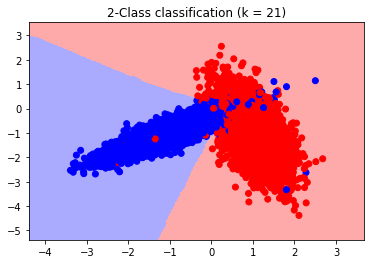

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)